In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("ny-flights.csv")
data

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


Q1. Summary of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fl_date         20817 non-null  object 
 1   unique_carrier  20817 non-null  object 
 2   airline_id      20817 non-null  int64  
 3   tail_num        20512 non-null  object 
 4   fl_num          20817 non-null  int64  
 5   origin          20817 non-null  object 
 6   dest            20817 non-null  object 
 7   dep_time        18462 non-null  float64
 8   dep_delay       18462 non-null  float64
 9   arr_time        18412 non-null  float64
 10  arr_delay       18383 non-null  float64
 11  cancelled       20817 non-null  float64
 12  arr             18412 non-null  object 
 13  dep             18462 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 2.2+ MB


Q2. Size of the Dataset

In [ ]:
print("size of dataset=", data.shape)

size of dataset= (20817, 14)


Q3. Datatype of the columns

In [ ]:
print("data types of each column:\n",data.dtypes)

data types of each column:
 fl_date            object
unique_carrier     object
airline_id          int64
tail_num           object
fl_num              int64
origin             object
dest               object
dep_time          float64
dep_delay         float64
arr_time          float64
arr_delay         float64
cancelled         float64
arr                object
dep                object
dtype: object


Q4. Find the missing values in the dataset

In [ ]:
missing_values = data.isnull().sum()

print("Missing values in each column:\n",missing_values)


Missing values in each column:
 fl_date              0
unique_carrier       0
airline_id           0
tail_num           305
fl_num               0
origin               0
dest                 0
dep_time          2355
dep_delay         2355
arr_time          2405
arr_delay         2434
cancelled            0
arr               2405
dep               2355
dtype: int64


Q5. Find mean,median,standard deviation of dep_delay column

In [ ]:
dep_delay_mean = data['dep_delay'].mean()
dep_delay_median = data['dep_delay'].median()
dep_delay_SD = data['dep_delay'].std()

print("mean of departure delay column =",dep_delay_mean)
print("median of departure delay column =",dep_delay_median)
print("standard deviation of departure delay column =",dep_delay_SD)

mean of departure delay column = 22.77212653017008
median of departure delay column = 0.0
standard deviation of departure delay column = 59.766151524161764


Q6.find any potential outliers in the dep_delay column

In [ ]:
column_name = 'dep_delay'

Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

print("Q1 =" , Q1)
print("Q3 =", Q3)
print("IQR =", IQR)
print("Lower Bound =", lower_bound)
print("Upper Bound =", upper_bound)
print("Number of outliers in temp =", len(outliers))
print("\nOutliers:\n",outliers)

Q1 = -4.0
Q3 = 22.0
IQR = 26.0
Lower Bound = -43.0
Upper Bound = 61.0
Number of outliers in temp = 2290

Outliers:
                    fl_date unique_carrier  airline_id tail_num  fl_num origin  \
11     2014-01-01 00:00:00             AA       19805   N336AA     181    JFK   
67     2014-01-01 00:00:00             B6       20409   N318JB     115    SYR   
70     2014-01-01 00:00:00             B6       20409   N318JB     418    JFK   
77     2014-01-01 00:00:00             B6       20409   N337JB     316    JFK   
79     2014-01-01 00:00:00             B6       20409   N337JB    1515    SYR   
...                    ...            ...         ...      ...     ...    ...   
20657  2014-01-31 00:00:00             DL       19790   N977DL    2219    LGA   
20658  2014-01-31 00:00:00             DL       19790   N900DE    2231    LGA   
20696  2014-01-31 00:00:00             MQ       20398   N856MQ    2875    ART   
20773  2014-01-31 00:00:00             EV       20366   N828AS    5726    

Q7. Correlation matrix of the dataset ny-flights

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_columns.corr()

print("Correlation Matrix:\n",correlation_matrix)


Correlation Matrix:
             airline_id    fl_num  dep_time  dep_delay  arr_time  arr_delay  \
airline_id    1.000000  0.165427  0.068787  -0.001510  0.000359   0.018637   
fl_num        0.165427  1.000000  0.037538   0.003662  0.015185   0.009601   
dep_time      0.068787  0.037538  1.000000   0.205036  0.658571   0.168048   
dep_delay    -0.001510  0.003662  0.205036   1.000000  0.033294   0.952380   
arr_time      0.000359  0.015185  0.658571   0.033294  1.000000   0.013732   
arr_delay     0.018637  0.009601  0.168048   0.952380  0.013732   1.000000   
cancelled     0.081613  0.113438  0.008808   0.088048       NaN        NaN   

            cancelled  
airline_id   0.081613  
fl_num       0.113438  
dep_time     0.008808  
dep_delay    0.088048  
arr_time          NaN  
arr_delay         NaN  
cancelled    1.000000  


Q8. Heat map of the above correlation matrix

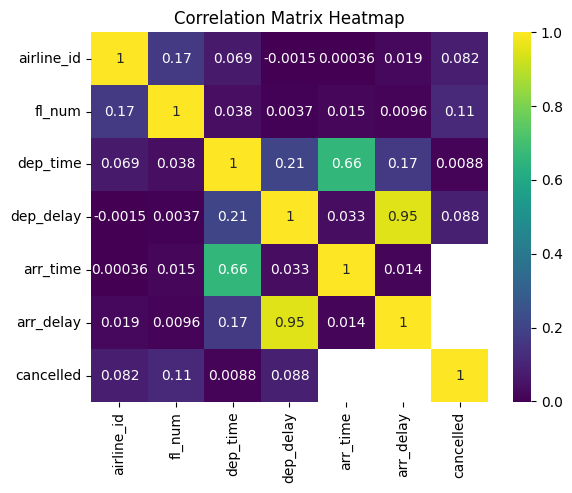

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()

Q9. which airlines had the most number of departure delay recorded

In [32]:

delayed_flights = data[data['dep_delay'] > 0]

delayed_counts= delayed_flights['airline_id'].value_counts().reset_index()
delayed_counts.columns=['airline_id','count']
delayed_counts=delayed_counts.sort_values('count',ascending=False)
print(delayed_counts)

    airline_id  count
0        20409   2206
1        19790   1794
2        19393   1125
3        19805    974
4        20398    877
5        20366    811
6        19977    443
7        20355    373
8        21171    155
9        20437    125
10       20436     19
11       19690     18
12       20304      7
